# 第 5 章 多元回归分析：OLS 的渐近性
## C5.1【作图分析正态假定】 本题使用WAGE1.RAW 中的数据。 

（1）估计方程 $wage=\beta_0+\beta_1 educ+\beta_2 exper+\beta_3 tenure+\mu$ 保留残差并画出其直方图。 

（2）以log(wage)作为因变量重做第（1）部分。 

（3）你认为是水平值-水平值模型还是对数-水平值模型更接近于满足假定MLR.6？ 

In [1]:
library(haven)
WAGE1 <- read_dta("C:/Users/bradl/SRM/data/WAGE1.DTA")
attach(WAGE1)

（1）估计方程 $wage=\beta_0+\beta_1 educ+\beta_2 exper+\beta_3 tenure+\mu$ 保留残差并画出其直方图。

In [2]:
fit1<-lm(wage~educ+exper+tenure) #拟合上述模型。 
summary(fit1)


Call:
lm(formula = wage ~ educ + exper + tenure)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6068 -1.7747 -0.6279  1.1969 14.6536 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.87273    0.72896  -3.941 9.22e-05 ***
educ         0.59897    0.05128  11.679  < 2e-16 ***
exper        0.02234    0.01206   1.853   0.0645 .  
tenure       0.16927    0.02164   7.820 2.93e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.084 on 522 degrees of freedom
Multiple R-squared:  0.3064,	Adjusted R-squared:  0.3024 
F-statistic: 76.87 on 3 and 522 DF,  p-value: < 2.2e-16


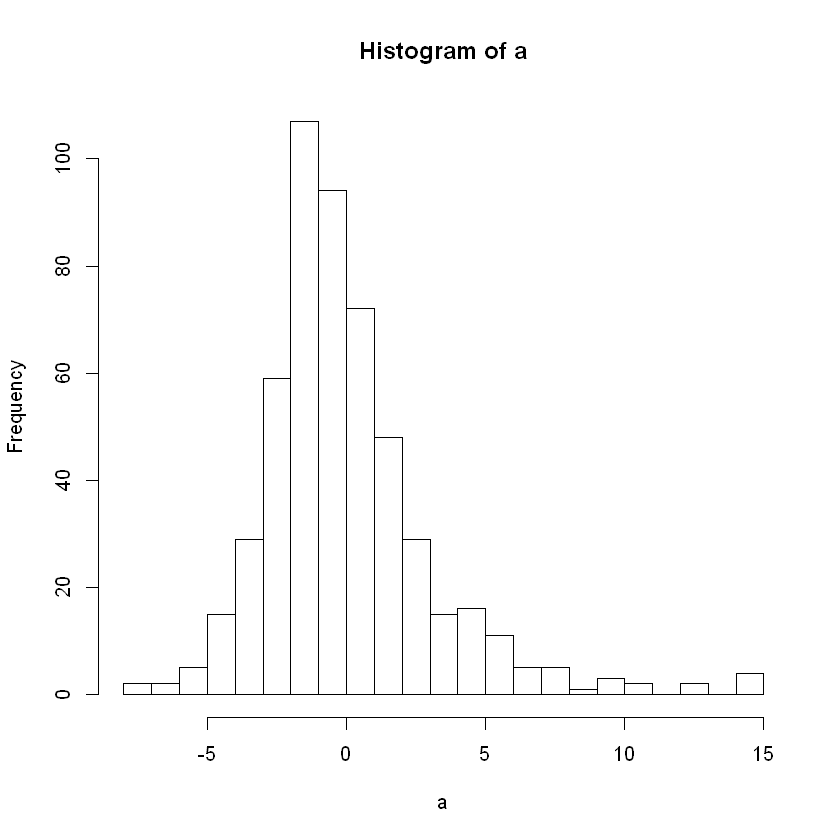

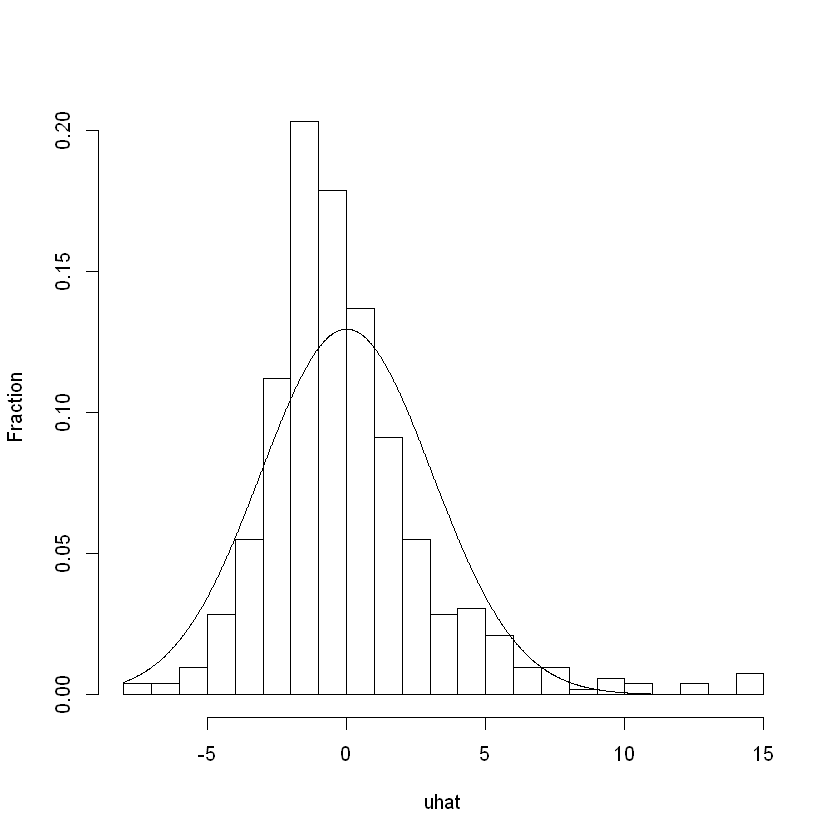

In [3]:
a<-residuals(fit1) #将fit1的残差保存在a 中。 
sda<-sd(a) #求得a的标准差。 
h = hist(a,breaks = 27) #绘制a的直方图。我们发现原书答案的y轴是用的百分比，而当前的y轴是计数值。用下面的命令进行调整。 
h$density = h$counts/sum(h$counts) #
plot(h,freq=FALSE,xlab = "uhat", ylab = "Fraction", main = "") #重新作图。 
x<-pretty(c(-8,15),1000) #为了和正态曲线做对比，在-8到15这个区间取1000个美观分割点。 
y<-dnorm(x,0,sda) #生成均值为0 和方差为sda 的正态分布。 
lines(x,y)

（2）以log(wage)作为因变量重做第（1）部分。 

In [4]:
fit2<-lm(log(wage)~educ+exper+tenure) #拟合上述模型。 
summary(fit2)


Call:
lm(formula = log(wage) ~ educ + exper + tenure)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.05802 -0.29645 -0.03265  0.28788  1.42809 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.284360   0.104190   2.729  0.00656 ** 
educ        0.092029   0.007330  12.555  < 2e-16 ***
exper       0.004121   0.001723   2.391  0.01714 *  
tenure      0.022067   0.003094   7.133 3.29e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4409 on 522 degrees of freedom
Multiple R-squared:  0.316,	Adjusted R-squared:  0.3121 
F-statistic: 80.39 on 3 and 522 DF,  p-value: < 2.2e-16


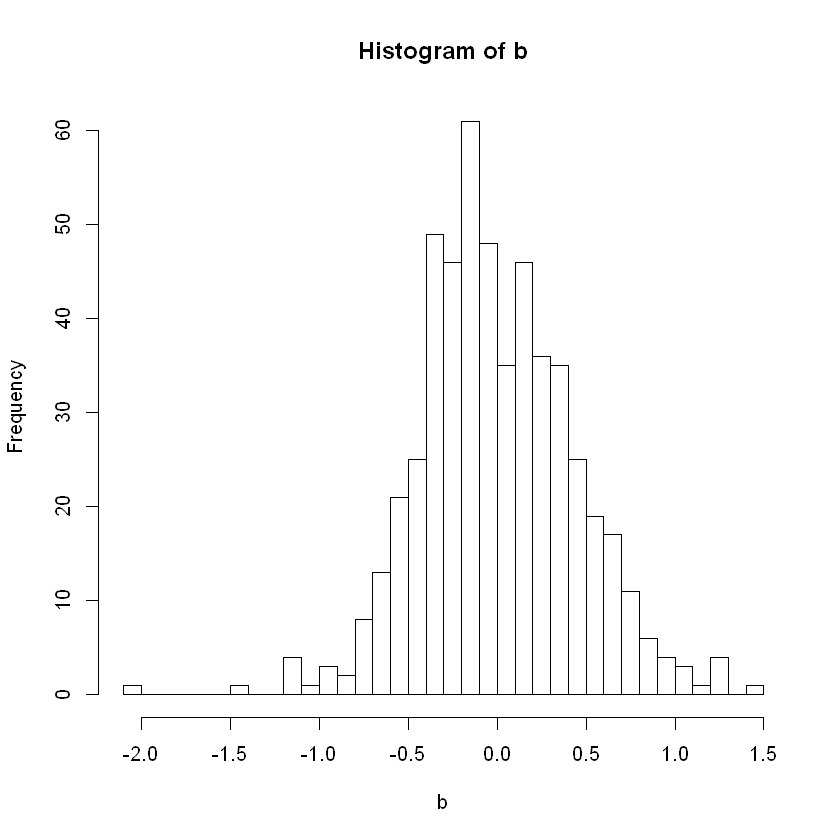

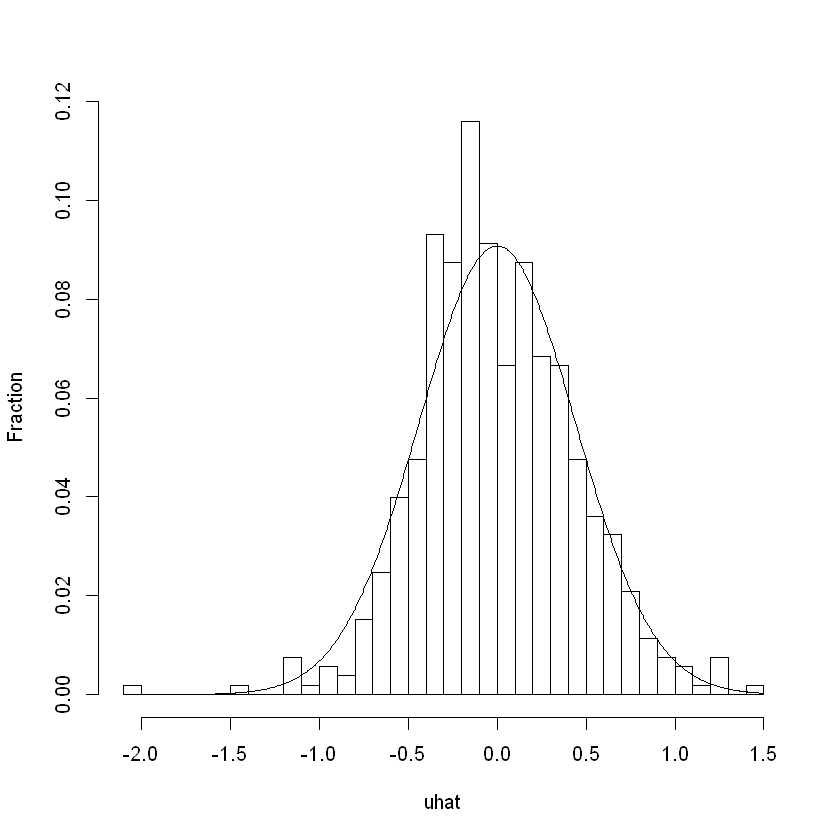

In [5]:
b<-residuals(fit2) #将fit2 的残差保存在b 中。 
sdb<-sd(b) #求得b 的标准差。 
h = hist(b,breaks = 27) 
h$density = h$counts/sum(h$counts) #将当前y轴的计数值改为百分比。 
plot(h,freq=FALSE,xlab = "uhat", ylab = "Fraction", main = "") #重新作图。 
x<-pretty(c(-2,1.5),500)  #为了和正态曲线做对比，在-8到15这个区间取1000 个美观分割点。 
y<-dnorm(x,0,sdb)/10 #生成均值为0和方差为sdb 的正态分布。 
lines(x,y)

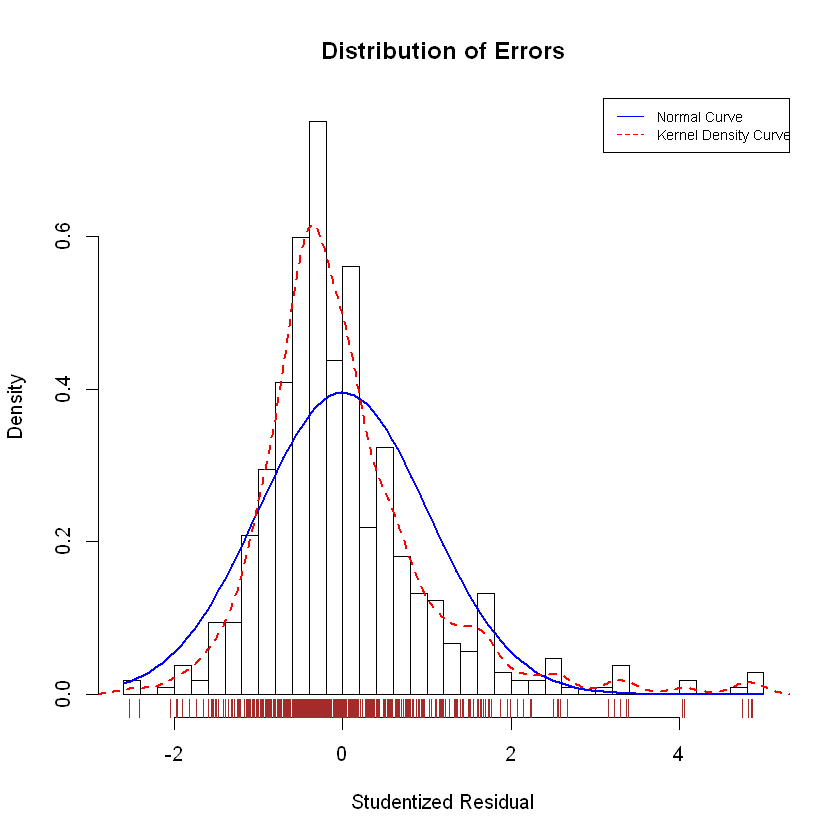

In [6]:
residplot <- function(fit, nbreaks=50) {
    z <- rstudent(fit) 
    hist(z, breaks=nbreaks, freq=FALSE, xlab="Studentized Residual", main="Distribution of Errors") 
    rug(jitter(z), col="brown") 
    curve(dnorm(x, mean=mean(z), sd=sd(z)), add=TRUE, col="blue", lwd=2) 
    lines(density(z)$x, density(z)$y, col="red", lwd=2, lty=2)  
    legend("topright", legend = c( "Normal Curve", "Kernel Density Curve"), lty=1:2, col=c("blue","red"), cex=.7)
}
residplot(fit1)

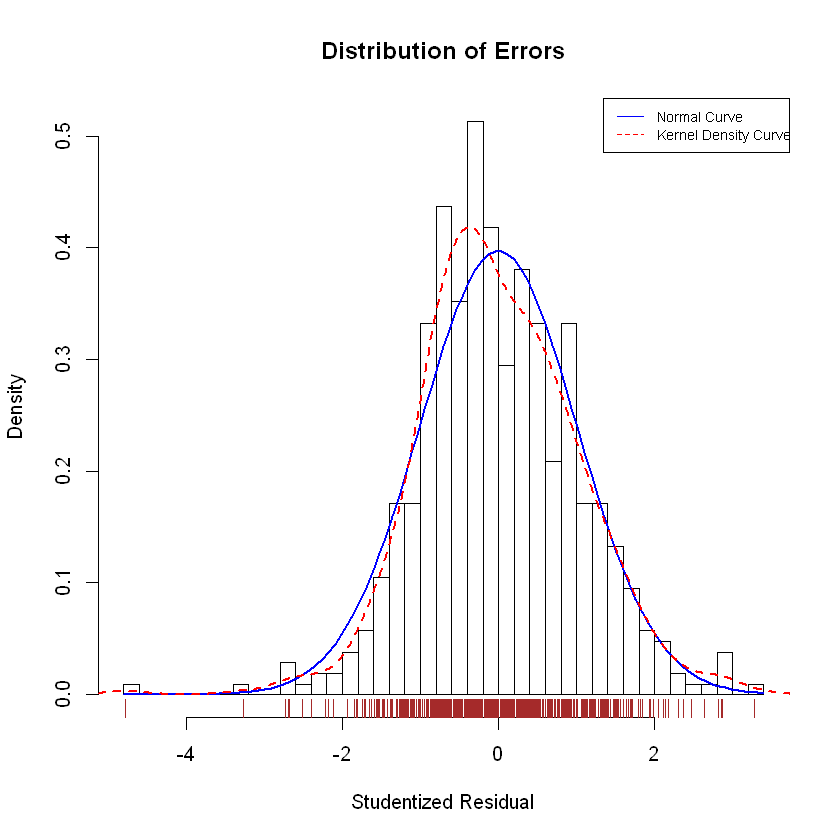

In [7]:
residplot(fit2) 
detach(WAGE1)

（3）你认为是水平值-水平值模型还是对数-水平值模型更接近于满足假定MLR.6？

MLR.6（正态性）：总体误差$\mu$独立于解释变量且服从均值为0和方差为$\sigma^2$的正态分布。对数-水平值模型更接近于满足假定。 

## C5.2【提取标准误；保留系数小数位数】 

本题使用 GPA2.RAW 中的数据。 

（1）使用所有4137 个观测，估计方程 $colgpa=\beta_0+\beta_1ℎ𝑠𝑝e𝑟𝑐+\beta_2 sat+\mu$ 并以标准形式报告结论。

（2）使用前2070 个观测再重新估计第（1）部分中的方程。 
 
（3）求出第（1）部分和第（2）部分所得到的标准误的比率。并将这个比率与式（5.10）中的结论相比较。 

In [8]:
gpa2 <- read_dta("C:/Users/bradl/SRM/data/gpa2.dta")
attach(gpa2)

The following object is masked from WAGE1:

    female



（1）使用所有4137 个观测，估计方程 $colgpa=\beta_0+\beta_1ℎ𝑠𝑝e𝑟𝑐+\beta_2 sat+\mu$ 并以标准形式报告结论。

In [9]:
fit1<-lm(colgpa~hsperc+sat) #拟合上述模型。 
summary(fit1) #查看拟合结果。R-squared:  0.2734。  
round(fit1$coefficients,4) 


Call:
lm(formula = colgpa ~ hsperc + sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6007 -0.3581  0.0329  0.3963  1.7599 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.392e+00  7.154e-02   19.45   <2e-16 ***
hsperc      -1.352e-02  5.495e-04  -24.60   <2e-16 ***
sat          1.476e-03  6.531e-05   22.60   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5615 on 4134 degrees of freedom
Multiple R-squared:  0.2734,	Adjusted R-squared:  0.2731 
F-statistic: 777.9 on 2 and 4134 DF,  p-value: < 2.2e-16


(Intercept)      hsperc         sat 
     1.3918     -0.0135      0.0015

（2）使用前2070 个观测再重新估计第（1）部分中的方程。 


In [10]:
a<-gpa2[c(1:2070),] #把gpa2 的前2070 个观测保存在a 中。 
fit2<-lm(colgpa~hsperc+sat, data=a) #使用前2070 个观测再重新估计第（1）部分中的方程。 
summary(fit2) #
round(fit2$coefficients,4) 


Call:
lm(formula = colgpa ~ hsperc + sat, data = a)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28027 -0.34910  0.04051  0.38046  1.69464 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.436e+00  9.778e-02   14.69   <2e-16 ***
hsperc      -1.275e-02  7.185e-04  -17.74   <2e-16 ***
sat          1.468e-03  8.858e-05   16.58   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5395 on 2067 degrees of freedom
Multiple R-squared:  0.2827,	Adjusted R-squared:  0.282 
F-statistic: 407.4 on 2 and 2067 DF,  p-value: < 2.2e-16


(Intercept)      hsperc         sat 
     1.4360     -0.0127      0.0015

（3）求出第（1）部分和第（2）部分所得到的标准误的比率。并将这个比率与式（5.10）中 的结论相比较

In [11]:
s1<-coef(summary(fit1))[, "Std. Error"] 
s2<-coef(summary(fit2))[, "Std. Error"] #提取fit2 各变量的标准误。 
mean(s2/s1) 
sqrt(4137/2070)
detach(gpa2)

[1] 1.343576

[1] 1.413701

## C5.3【拉格朗日乘数统计量 LM】 

在第4 章的方程（4.42）中，计算检验motheduc 和fatheduc 是否联合显著的LM 统计量。在 求约束模型的残差时一定要注意，估计约束模型所用的观测，都包含于无约束模型所有变量可 以使用的数据中。（参见例4.9） 

In [12]:
BWGHT <- read_dta("C:/Users/bradl/SRM/data/BWGHT.DTA")
attach(BWGHT) 
a<-na.omit(BWGHT) #把不含缺失值的观测保存在a 中。 
fit1<-lm(bwght~cigs+parity+faminc, data = a) #用数据集a 拟合上述模型。 
u<-resid(fit1) #把fit1 的残差保存在u 中。 
fit2<-lm(u~cigs+parity+faminc+motheduc+fatheduc,data = a) #做u对所有变量的回归。 
r2<-summary(fit2)$r.squared #获取fit2 的R2，保存在r2 中，r2 为0.0024199。 
LM <-r2*nobs(fit2) #计算拉格朗日统计量，结果为2.882101。 共有q=2 个排除性约束，所以卡方检验的自由度为2。
qchisq(1-0.1,2) 

[1] 4.60517

In [13]:
1-pchisq(LM,2) #我们也可以计算LM 统计检验量对应的卡方检验的p值，结果为0.236679。因此我们不能拒绝原假设。 
detach(BWGHT) 

[1] 0.236679

## C5.4【偏度计算】 

有几个统计量常被用于侦查潜在总体分布的非正态性。这里，我们将研究一个度量了分布偏斜程度的统计量。记得任何一个正态随机变量都是围绕着其均值对称分布的。因此，如果我们把 一个对称分布的随机变量标准化，比如$z=(y−\mu_y)/\sigma_y$，其中$𝜇_𝑦=E(y)$，$𝜎_𝑦=sd(y)$，那么z的均值就为0，方差为1，而且$E(𝑧^3)=0$。给定一个数据样本${y_i：i=1,\dots,n}$。如果y在总体中服从正态分布，那么，对于样本中标准化之后的数据而言，样本偏度指标就不应该显著异于 0。 

（1）首先使用数据集401KSUBS.RAW 中具有fsize=1 的那些观测。求出 inc 的偏斜指标。同样 求出log(inc)的偏斜程度。哪个变量的偏斜程度更大，并因而看上去更不像正态分布。 

（2）然后使用BWGHT2.RAW。求出 bwght 和log(bwght)的偏斜指标。你得到什么结论？ 

（3）评价如下命题：“对数变换总是使得一个恒为正的变量看上去更像正态分布。” 

（4）如果我们对回归背景下的正态假定感兴趣，我们应该评价y 和log(y)的无条件分布吗？请 给出你的解释

（1）首先使用数据集401KSUBS.RAW 中具有fsize=1 的那些观测。求出 inc 的偏斜指标。同样 求出log(inc)的偏斜程度。哪个变量的偏斜程度更大，并因而看上去更不像正态分布。 

In [14]:
X401ksubs<-read_dta("C:/Users/bradl/SRM/data/401ksubs.dta")
attach(X401ksubs)  

In [15]:
a<-subset(X401ksubs,fsize==1) #将fsize=1 的观测保存在a 中。 
skew<-function(x){    
    m<-mean(x)     
    n<-length(x)     
    s<-sd(x)     
    skew<-sum((x-m)^3/s^3)/n     
    return(c(skew=skew)) } #参照《R 语言实战》7.1.1 节自编偏度的函数 skew。 
skew(a$inc) #求inc 的偏斜指标，结果为1.862259。 
skew(log(a$inc)) #log(inc)的偏斜指标，结果为0.3606031

skew 
1.862259

skew 
0.3606031

（2）然后使用BWGHT2.RAW。求出 bwght 和log(bwght)的偏斜指标。你得到什么结论？ 

In [16]:
bwght2<-read_dta("C:/Users/bradl/SRM/data/bwght2.dta")
attach(bwght2)

The following object is masked from X401ksubs:

    male



In [17]:
skew(bwght) # 求bwght 的偏斜指标，结果为-0.6001563。 
skew(log(bwght))  #log(bwght)的偏斜指标，结果为-2.948616。 

skew 
-0.6001563

skew 
-2.948616

（3）评价如下命题：“对数变换总是使得一个恒为正的变量看上去更像正态分布。” 

上文（1）和（2）的结果说明对数变化并不总是使得一个恒为正的变量看上去更像正态分布。 但对数变化确实能使一些变量，特别是以货币（元，美元等）作为单位的变量更好地满足正态性。 

（4）如果我们对回归背景下的正态假定感兴趣，我们应该评价y和log(y)的无条件分布吗？请给出你的解释。 

我们应该评价y 和log(y)的条件分布，因为y和log(y)是以自变量为条件的。通常我们对回归的 残差u进行正态性（包括偏斜指标）分析。 